In [1]:
import pystan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
negBin1 = """
data {
    real alpha;
    real beta;
}
generated quantities {
    real y = neg_binomial_rng(alpha, beta);
}
"""
NegBin1_model = pystan.StanModel(model_code = negBin1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bf530e9287f1dacee4095f0fe9a7eb98 NOW.


In [3]:
negBin2 = """
data {
    real mu;
    real phi;
}
generated quantities {
    real y = neg_binomial_2_rng(mu, phi);
}
"""
NegBin2_model = pystan.StanModel(model_code = negBin2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_455d3f9ec35a5ce2cf883b247c9a2a1c NOW.


In [30]:
# mean = 2; var = 2.4
dataNegBin1 = {'alpha': 10, 'beta': 5}
dataNegBin2 = {'mu': 2, 'phi': 10}
neg_bin1_sam = modelNegBin1.sampling(data = dataNegBin1, algorithm = 'Fixed_param', iter = 1000)
neg_bin2_sam = modelNegBin2.sampling(data = dataNegBin2, algorithm = 'Fixed_param', iter = 1000)
negBin1_df = pd.DataFrame(neg_bin1_sam.extract())
negBin2_df = pd.DataFrame(neg_bin2_sam.extract())
negBin1_df.drop('lp__', axis = 1, inplace = True)
negBin2_df.drop('lp__', axis = 1, inplace = True)

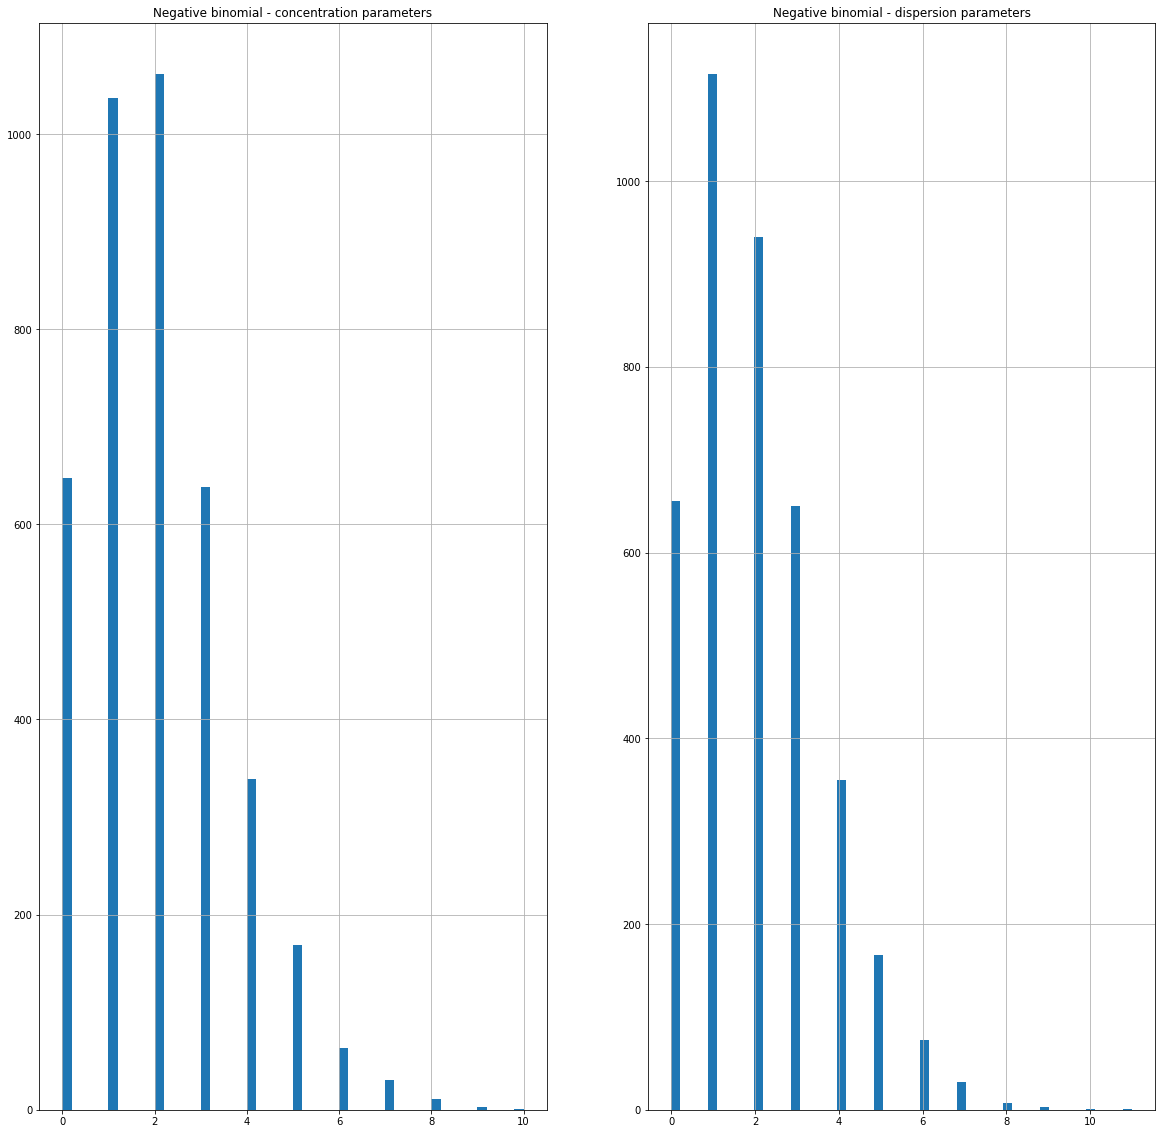

In [35]:
plt.figure(figsize = [20, 20])
plt.subplot(1, 2, 1).set_title("Negative binomial - concentration parameters")
plt.hist(negBin1_df['y'], bins = 50)
plt.grid()
plt.subplot(1, 2, 2).set_title("Negative binomial - dispersion parameters")
plt.hist(negBin2_df['y'], bins = 50)
plt.grid()
plt.show()

In [36]:
poisson = """
data {
    real lambda;
}
generated quantities {
    real y = poisson_rng(lambda);
}
"""
Poisson_model = pystan.StanModel(model_code = poisson)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_561eb27601f382bd5393c5c214972a4b NOW.


In [38]:
dataPoisson = {'lambda': 2}
poisson_sam = Poisson_model.sampling(data = dataPoisson, algorithm = 'Fixed_param', iter = 1000)
poisson_df = pd.DataFrame(poisson_sam.extract())
poisson_df.drop('lp__', axis = 1, inplace = True)

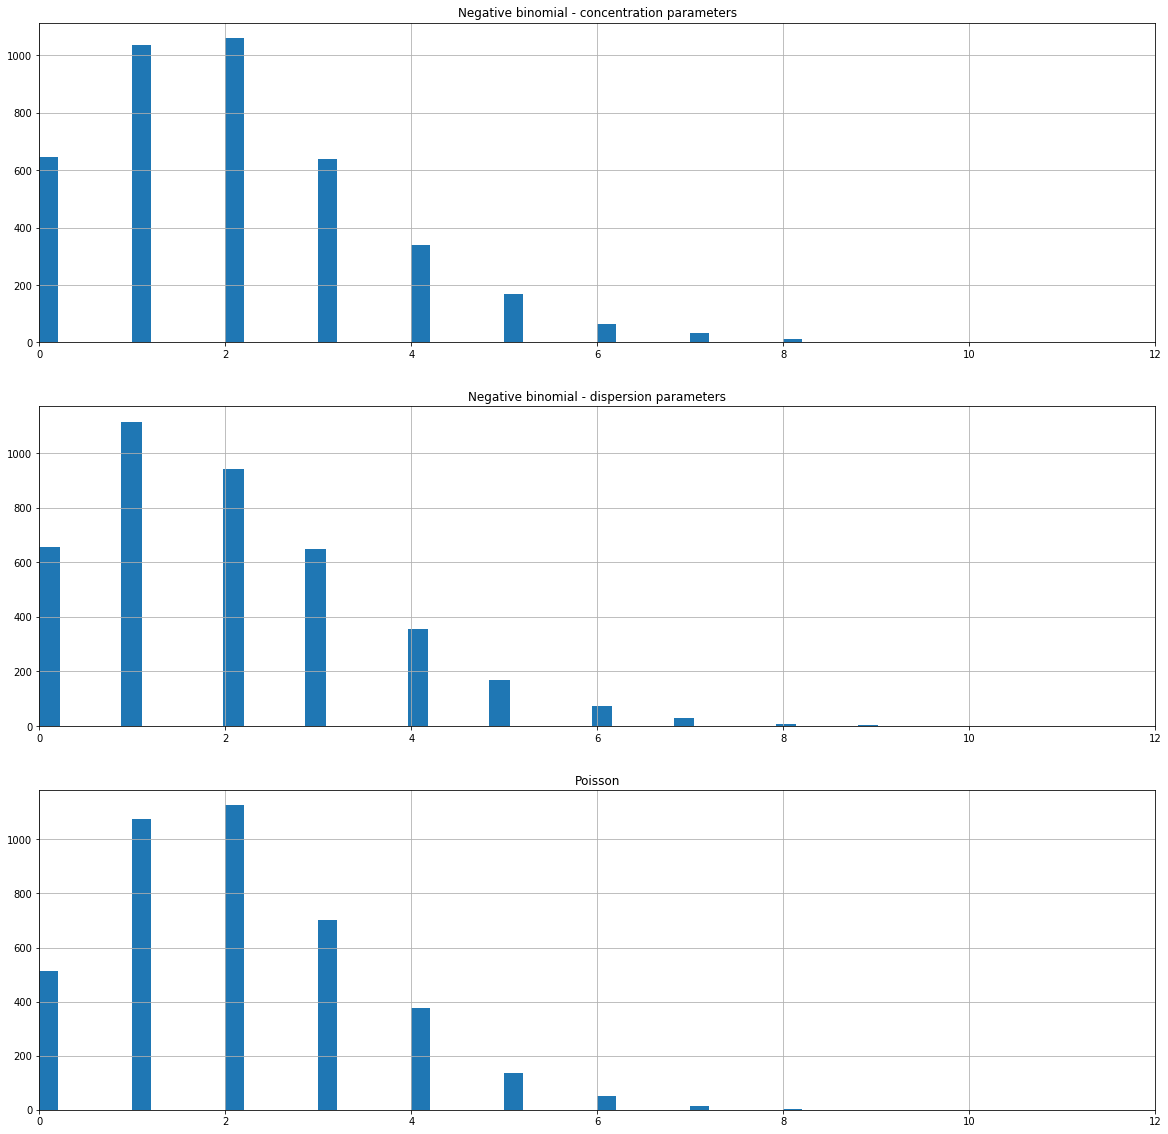

In [41]:
plt.figure(figsize = [20, 20])
plt.subplot(3, 1, 1).set_title('Negative binomial - concentration parameters')
plt.hist(negBin1_df['y'], bins = 50)
plt.xlim((0, 12))
plt.grid()
plt.subplot(3, 1, 2).set_title('Negative binomial - dispersion parameters')
plt.hist(negBin2_df['y'], bins = 50)
plt.xlim((0, 12))
plt.grid()
plt.subplot(3, 1, 3).set_title('Poisson')
plt.hist(poisson_df['y'], bins = 50)
plt.xlim((0, 12))
plt.grid()
plt.show()